# Documentation
    editor: Qin Huang
    05/21/18

## Problem Discussion
    The project is designed for Python2.
    The project will give the solutions of three problems mainly:
* Problem 1:
    Given an overall desired coverage footprint and a sequence of n communications towers, what is the resulting resolved coverage?
* Problem 2:
    What is the total area of coverage relative to the desired total coverage area of the original footprint?
* Problem 3:
    On average, how many communications towers are required before full coverage is obtained?
### Given Conditions
* For Problem 1 
    The large rectangular area is L×W. 
    The number of tower putted in is n.
* For Problem 3
    The region area needed to be covered by towers is L×W.
    
### Algorithm
#### Problem1
* Starting at a random point (start_x, start_y) in the rectangular.([0, W], [0, b]) 
    Each rectangle is defined by its width and height (width, height). And sub-rectangular will not go out of the large rectangular. [ 0 , Region dimension - Position ]random.randint(a,b)

* When the next tower put in, firstly make judgement if it had any overlap area with others. If the overlapped area is larger than zero:
    Trimmed down the next rectangular firstly:
    * The candidate rectangulars have limited number of possible positions (startx,starty,endx,endy) which startx, endx come from the x values of previous rectangulars, and starty, endy come from the y values of previous rectangulars.
    * To optimize the process further, we make decision if the overlapping area creates x trimming line or y trimming line exactly. For example, in fig1 of the word file, the previous rectangular creates verticle trimming line. In fig2 of the word file, the previous rectangular creates horizontal trimming line.
    
* Among all the candidate rectangulars, delete those have overlapping area with previous rectangulars. Generate a dictionary of all candidate rectangulars.
 
* Choose the max one and update position.
 
* Iterate the process and we can get a set of all rectangulars.

* Calculate the area of each rectangular and sum them to have the covered area.
    
#### Problem2

* Calculate the ratio of the covered area to L*W

#### Problem3

* Calculate the required n when the ratio of the covered area is 1.

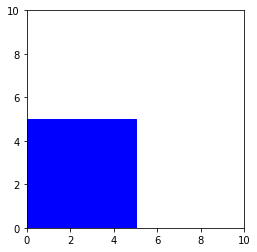

In [66]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
from itertools import cycle
from __future__ import division

class rect(object):
    
    def __init__(self,startx,starty,endx,endy):
        assert isinstance(startx,int) and startx>=0
        assert isinstance(starty,int) and starty>=0
        assert isinstance(endx,int) and endx>=0
        assert isinstance(endy,int) and endy>=0
        self.startx = startx
        self.starty = starty
        self.endx = endx
        self.endy = endy
    
    def __repr__(self):
        return "rectangular(%s,%s,%s,%s)" %(self.startx,self.starty,self.endx,self.endy)
    
    def area(self):
        return (self.endx-self.startx)*(self.endy-self.starty)
    
    def intersect(self, other): 
        #input two sub-rectangulars
        xdis=min(self.endx,other.endx)-max(self.startx,other.startx)
        ydis=min(self.endy,other.endy)-max(self.starty,other.starty)
        #ther overlapping rectangular area is xdis*ydis
        if xdis<=0 or ydis<=0:
            return False
        else:
            return True    
        
    # Plot 
    def graph(self,Wid,Len):
        
        assert isinstance(Len,int) and Len>0
        assert isinstance(Wid,int) and Wid>0
        fig1 = plt.figure()
        #change color
        colors=cycle('bgrcmykw')
        ax = fig1.add_subplot(111, aspect='equal')
        ax.set_xlim(0, Wid)
        ax.set_ylim(0, Len)
        ax.add_patch(
            patches.Rectangle(
                (self.startx, self.starty),   # (x,y)
                self.endx-self.startx,          # width
                self.endy-self.starty,  # height
                color=colors.next()
            )
        )
        plt.show()

rect(0,0,5,5).graph(10,10)

# Problem1 

rectangular(2,3,5,5) 0
rectangular(2,3,5,5) 1
rectangular(2,1,4,3) 2
rectangular(3,4,5,5) 3
rectangular(2,1,4,4) 4


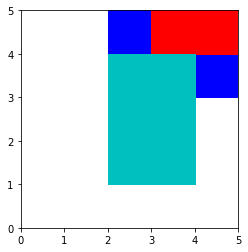

covered area is 18
18


In [70]:
def covered_area(n, L, W):

    #when we need n sub-rectangulars to cover a L*W region 
    assert isinstance(n,int) and n>0
    assert isinstance(L,int) and L>0
    assert isinstance(W,int) and W>0

    num=0
    dirc={}

    while num<n:
    #generate sub-rectangular
        random.seed()                            #avoid pseudo random number 
        startx=random.randint(1,W-1)
        starty=random.randint(1,L-1)
        # the num-th rectangular will have the left bottom point(startx,starty)
        sub_wid=random.randint(1,W-startx)
        sub_len=random.randint(1,L-starty)
        
        endx=startx+sub_wid
        endy=starty+sub_len
        # the num-th rectangular will have the right top point(endx,endy)
        #print(num)
        tmp = rect(startx,starty,endx,endy)
        dirc[num] = tmp
        if num==0:
            pass
        else:
            
            x_in=[r.startx for r in dirc.values() if r.intersect(dirc[num]) and dirc[num].startx<r.startx<dirc[num].endx]
            x_in+=[r.endx for r in dirc.values() if r.intersect(dirc[num]) and dirc[num].startx<r.endx<dirc[num].endx]
            #collect all x of intersecting rectangulars which can create one vertical trimming line through the num-th rectangular
            y_in=[r.starty for r in dirc.values() if r.intersect(dirc[num]) and dirc[num].starty<r.starty<dirc[num].endy]
            y_in+=[r.endy for r in dirc.values() if r.intersect(dirc[num]) and dirc[num].starty<r.endy<dirc[num].endy]
            #collect all y of intersecting rectangulars which can create one horizontal trimming line through the num-th rectangular

            #after trimming the num-th rectangular, now using permutation and combination in order to choose the max one
            x_in+=[dirc[num].startx,dirc[num].endx]
            y_in+=[dirc[num].starty,dirc[num].endy]

            x_in, y_in = list(set(x_in)), list(set(y_in))

            lst=[]
            for sx in x_in:
                for sy in y_in:
                    for ex in x_in:
                        for ey in y_in:
                            if sx >= ex or sy >= ey: continue  # invalid input
                            for i in range(num):
                                if rect(sx, sy, ex, ey).intersect(dirc[i])==False:
                                    lst.append(rect(sx,sy,ex,ey))
            
            for item in lst:          
                if item.area()==max([r.area() for r in lst]):
                    dirc[num].startx=item.startx
                    dirc[num].starty=item.starty
                    dirc[num].endx=item.endx
                    dirc[num].endy=item.endy
                    #update the rectangular after trimming
        num+=1
            
    
    temt=[i for i in list(dirc.values())]
    #each item in temt is a rectangular
    
    
    fig1 = plt.figure()
#change color
    colors=cycle('bgrcmyk')
    ax = fig1.add_subplot(111, aspect='equal')
    ax.set_xlim(0, W)
    ax.set_ylim(0, L)
    j=0
    print temt[j],j
    while j<len(temt):
        i=temt[j]
        
#         i.graph(Wid=W,Len=L)
#         #plot each rectangular
        ax.add_patch(
            patches.Rectangle(
                (i.startx, i.starty),   # (x,y)
                i.endx-i.startx,          # width
                i.endy-i.starty,  # height
                color=colors.next()
            )
        )    
    
        j+=1
        print i,j
    plt.show()
    
    result=map(lambda x: x.area(),temt)
    #each item in result is the area of a rectangular
    print 'covered area is %s'%sum(result) # the total coverage of rectangular
    return sum(result)



print(covered_area(4, 5, 5))


# Problem2

rectangular(2,2,5,5) 0
rectangular(2,2,5,5) 1
rectangular(3,2,4,4) 2
rectangular(4,1,5,2) 3
rectangular(2,4,5,5) 4
rectangular(4,2,5,3) 5


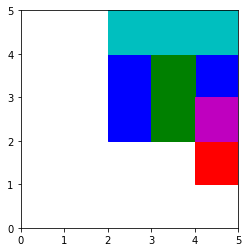

covered area is 16
0.64


In [71]:
def relative_area(n,L,W):
    assert isinstance(n,int) and n>0
    assert isinstance(L,int) and L>0
    assert isinstance(W,int) and W>0
    return covered_area(n,L,W)/(L*W)

print relative_area(5,5,5)

# Problem3

rectangular(2,9,5,10) 0
rectangular(2,9,5,10) 1


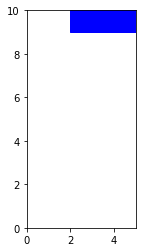

covered area is 3
rectangular(3,9,4,10) 0
rectangular(3,9,4,10) 1
rectangular(2,7,4,9) 2


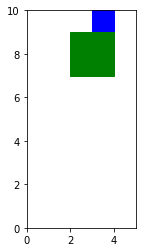

covered area is 5
rectangular(4,8,5,9) 0
rectangular(4,8,5,9) 1
rectangular(3,4,4,5) 2
rectangular(3,9,4,10) 3


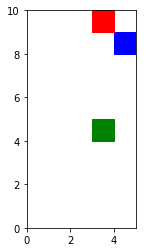

covered area is 3
rectangular(4,5,5,10) 0
rectangular(4,5,5,10) 1
rectangular(3,7,4,8) 2
rectangular(3,5,5,7) 3
rectangular(4,5,5,6) 4


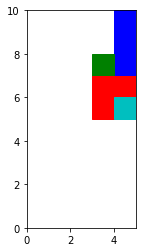

covered area is 11
rectangular(2,9,4,10) 0
rectangular(2,9,4,10) 1
rectangular(3,2,4,9) 2
rectangular(3,2,4,4) 3
rectangular(4,3,5,10) 4
rectangular(2,9,3,10) 5


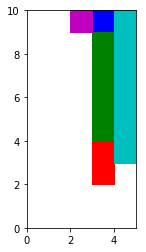

covered area is 19
rectangular(2,3,3,10) 0
rectangular(2,3,3,10) 1
rectangular(3,3,5,6) 2
rectangular(3,8,5,9) 3
rectangular(2,4,3,6) 4
rectangular(1,9,5,10) 5
rectangular(4,4,5,10) 6


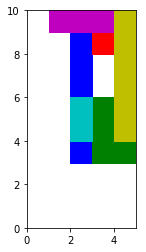

covered area is 27
rectangular(1,9,4,10) 0
rectangular(1,9,4,10) 1
rectangular(1,1,2,3) 2
rectangular(1,4,5,10) 3
rectangular(1,6,5,8) 4
rectangular(1,6,2,10) 5
rectangular(4,5,5,9) 6
rectangular(3,3,4,9) 7


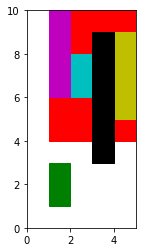

covered area is 51
rectangular(4,2,5,6) 0
rectangular(4,2,5,6) 1


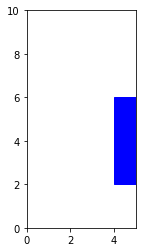

covered area is 4
rectangular(1,8,3,10) 0
rectangular(1,8,3,10) 1
rectangular(1,4,2,8) 2


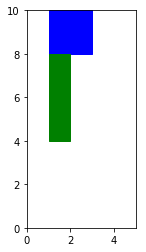

covered area is 8
rectangular(4,6,5,10) 0
rectangular(4,6,5,10) 1
rectangular(1,4,4,7) 2
rectangular(3,7,4,9) 3


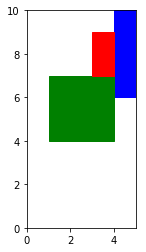

covered area is 15
rectangular(2,7,3,9) 0
rectangular(2,7,3,9) 1
rectangular(3,8,5,9) 2
rectangular(1,1,2,8) 3
rectangular(4,9,5,10) 4


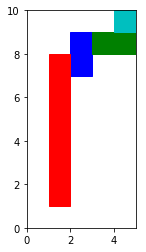

covered area is 12
rectangular(3,7,5,10) 0
rectangular(3,7,5,10) 1
rectangular(2,1,5,3) 2
rectangular(4,4,5,9) 3
rectangular(3,7,5,9) 4
rectangular(2,2,3,10) 5


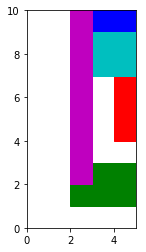

covered area is 29
rectangular(4,9,5,10) 0
rectangular(4,9,5,10) 1
rectangular(4,6,5,8) 2
rectangular(2,9,4,10) 3
rectangular(2,1,5,4) 4
rectangular(1,6,5,9) 5
rectangular(4,9,5,10) 6


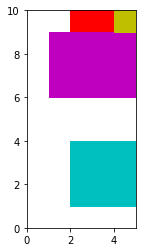

covered area is 27
rectangular(2,9,5,10) 0
rectangular(2,9,5,10) 1
rectangular(3,8,5,9) 2
rectangular(4,9,5,10) 3
rectangular(3,5,5,9) 4
rectangular(1,3,4,7) 5
rectangular(1,9,2,10) 6
rectangular(2,7,5,10) 7


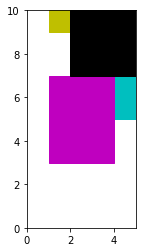

covered area is 36
rectangular(3,6,4,9) 0
rectangular(3,6,4,9) 1
rectangular(2,3,5,5) 2
rectangular(2,8,4,10) 3
rectangular(2,1,3,10) 4
rectangular(4,2,5,7) 5
rectangular(3,1,4,5) 6
rectangular(1,3,4,8) 7
rectangular(4,9,5,10) 8


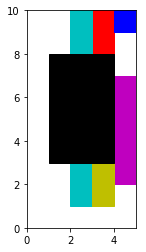

covered area is 47
rectangular(1,5,4,8) 0
rectangular(1,5,4,8) 1
rectangular(4,9,5,10) 2
rectangular(4,5,5,9) 3
rectangular(2,1,4,5) 4
rectangular(2,8,4,10) 5
rectangular(2,1,3,4) 6
rectangular(2,8,4,10) 7
rectangular(2,9,4,10) 8
rectangular(1,5,5,6) 9


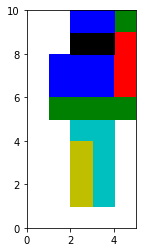

covered area is 39
rectangular(3,9,5,10) 0
rectangular(3,9,5,10) 1
rectangular(4,6,5,9) 2
rectangular(1,3,3,6) 3
rectangular(4,6,5,9) 4
rectangular(1,9,2,10) 5
rectangular(2,3,4,9) 6
rectangular(3,8,5,10) 7
rectangular(4,8,5,9) 8
rectangular(4,2,5,6) 9
rectangular(2,9,5,10) 10


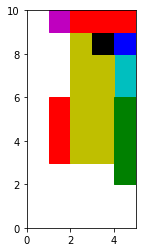

covered area is 39
rectangular(3,5,4,6) 0
rectangular(3,5,4,6) 1
rectangular(2,6,5,8) 2
rectangular(4,6,5,10) 3
rectangular(1,3,3,7) 4
rectangular(3,5,4,9) 5
rectangular(2,2,4,10) 6
rectangular(3,4,5,5) 7
rectangular(1,5,3,9) 8
rectangular(1,4,5,6) 9
rectangular(1,2,4,9) 10
rectangular(4,8,5,10) 11


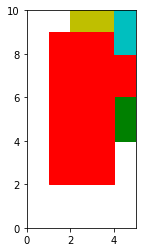

covered area is 80
rectangular(3,4,5,7) 0
rectangular(3,4,5,7) 1


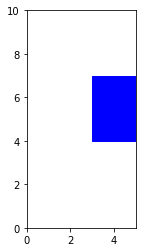

covered area is 6
rectangular(2,8,4,9) 0
rectangular(2,8,4,9) 1
rectangular(2,7,3,8) 2


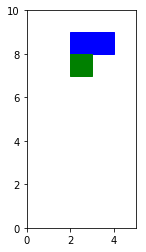

covered area is 3
rectangular(4,3,5,8) 0
rectangular(4,3,5,8) 1
rectangular(2,3,3,5) 2
rectangular(3,5,4,6) 3


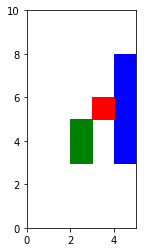

covered area is 8
rectangular(4,2,5,6) 0
rectangular(4,2,5,6) 1
rectangular(2,5,3,7) 2
rectangular(1,3,2,9) 3
rectangular(4,9,5,10) 4


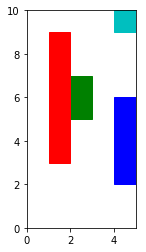

covered area is 13
rectangular(4,8,5,9) 0
rectangular(4,8,5,9) 1
rectangular(2,9,4,10) 2
rectangular(2,3,3,9) 3
rectangular(3,8,5,10) 4
rectangular(4,9,5,10) 5


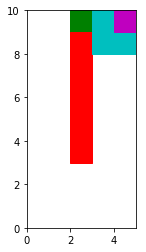

covered area is 14
rectangular(1,6,3,10) 0
rectangular(1,6,3,10) 1
rectangular(1,5,3,6) 2
rectangular(4,3,5,5) 3
rectangular(4,4,5,9) 4
rectangular(3,5,4,8) 5
rectangular(4,7,5,8) 6


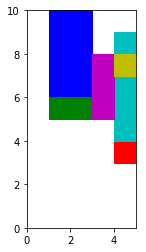

covered area is 21
rectangular(2,5,4,8) 0
rectangular(2,5,4,8) 1
rectangular(4,9,5,10) 2
rectangular(1,8,3,10) 3
rectangular(2,1,5,5) 4
rectangular(3,5,4,10) 5
rectangular(4,3,5,9) 6
rectangular(2,5,5,7) 7


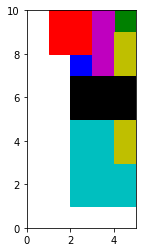

covered area is 40
rectangular(1,2,4,10) 0
rectangular(1,2,4,10) 1
rectangular(4,5,5,6) 2
rectangular(4,1,5,4) 3
rectangular(3,3,5,5) 4
rectangular(2,3,3,6) 5
rectangular(1,7,5,8) 6
rectangular(4,1,5,6) 7
rectangular(3,2,4,3) 8


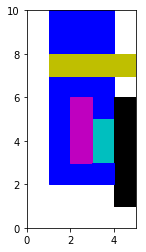

covered area is 45
rectangular(4,7,5,8) 0
rectangular(4,7,5,8) 1
rectangular(1,6,4,9) 2
rectangular(1,7,2,10) 3
rectangular(3,7,5,8) 4
rectangular(2,4,3,5) 5
rectangular(2,1,5,4) 6
rectangular(2,7,5,9) 7
rectangular(4,2,5,3) 8
rectangular(2,2,4,4) 9


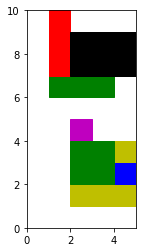

covered area is 36
rectangular(3,7,4,10) 0
rectangular(3,7,4,10) 1
rectangular(3,2,5,5) 2
rectangular(4,8,5,10) 3
rectangular(2,7,3,9) 4
rectangular(2,7,5,10) 5
rectangular(1,9,2,10) 6
rectangular(3,9,4,10) 7
rectangular(4,8,5,9) 8
rectangular(3,3,5,10) 9
rectangular(2,2,5,3) 10


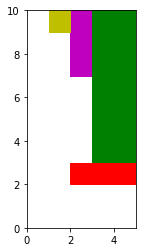

covered area is 42
rectangular(1,8,3,10) 0
rectangular(1,8,3,10) 1
rectangular(3,6,4,9) 2
rectangular(2,2,3,10) 3
rectangular(2,2,3,8) 4
rectangular(3,6,5,9) 5
rectangular(2,5,4,8) 6
rectangular(1,9,2,10) 7
rectangular(1,7,2,10) 8
rectangular(1,4,5,8) 9
rectangular(3,1,4,8) 10
rectangular(3,5,4,6) 11


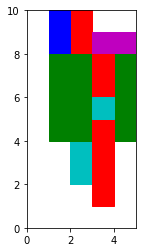

covered area is 61
rectangular(1,5,2,9) 0
rectangular(1,5,2,9) 1


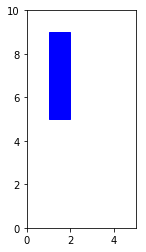

covered area is 4
rectangular(3,7,4,9) 0
rectangular(3,7,4,9) 1
rectangular(4,4,5,6) 2


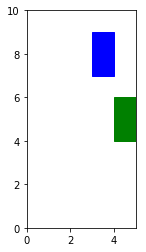

covered area is 4
rectangular(3,9,5,10) 0
rectangular(3,9,5,10) 1
rectangular(3,5,4,7) 2
rectangular(2,7,4,10) 3


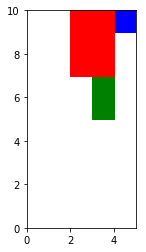

covered area is 10
rectangular(3,2,4,9) 0
rectangular(3,2,4,9) 1
rectangular(4,9,5,10) 2
rectangular(3,2,4,8) 3
rectangular(3,4,5,8) 4


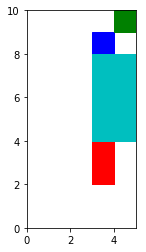

covered area is 22
rectangular(1,2,5,5) 0
rectangular(1,2,5,5) 1
rectangular(2,6,5,8) 2
rectangular(4,3,5,6) 3
rectangular(1,7,3,9) 4
rectangular(2,1,5,6) 5


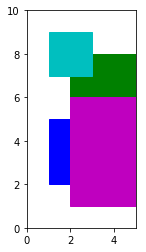

covered area is 40
rectangular(2,1,4,7) 0
rectangular(2,1,4,7) 1
rectangular(3,7,4,10) 2
rectangular(2,2,3,10) 3
rectangular(2,3,3,8) 4
rectangular(1,3,3,10) 5
rectangular(2,9,3,10) 6


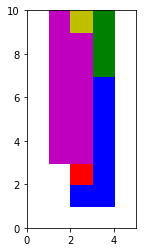

covered area is 43
rectangular(4,5,5,10) 0
rectangular(4,5,5,10) 1
rectangular(4,5,5,10) 2
rectangular(3,2,4,3) 3
rectangular(4,4,5,7) 4
rectangular(1,8,3,9) 5
rectangular(3,5,5,8) 6
rectangular(1,4,4,10) 7


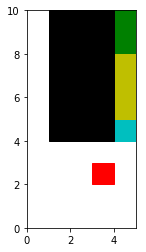

covered area is 40
rectangular(4,2,5,7) 0
rectangular(4,2,5,7) 1
rectangular(1,9,2,10) 2
rectangular(1,4,3,6) 3
rectangular(2,5,5,10) 4
rectangular(3,7,4,9) 5
rectangular(4,4,5,5) 6
rectangular(3,3,5,5) 7
rectangular(2,9,4,10) 8


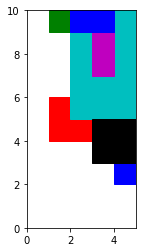

covered area is 34
rectangular(1,7,4,8) 0
rectangular(1,7,4,8) 1
rectangular(3,3,5,7) 2
rectangular(4,3,5,7) 3
rectangular(3,4,4,8) 4
rectangular(3,2,4,3) 5
rectangular(4,5,5,9) 6
rectangular(4,4,5,5) 7
rectangular(4,4,5,10) 8
rectangular(2,3,5,10) 9


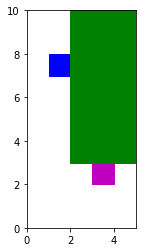

covered area is 52
rectangular(1,4,3,8) 0
rectangular(1,4,3,8) 1


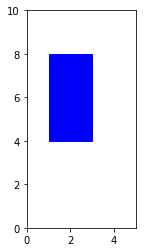

covered area is 8
rectangular(1,6,5,7) 0
rectangular(1,6,5,7) 1
rectangular(1,9,3,10) 2


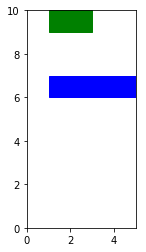

covered area is 6
rectangular(4,1,5,10) 0
rectangular(4,1,5,10) 1
rectangular(1,5,4,10) 2
rectangular(4,7,5,8) 3


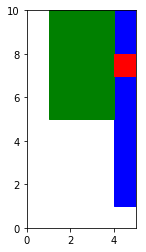

covered area is 25
rectangular(3,7,4,8) 0
rectangular(3,7,4,8) 1
rectangular(1,2,4,7) 2
rectangular(3,3,5,4) 3
rectangular(3,8,5,9) 4


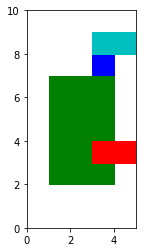

covered area is 20
rectangular(2,1,4,5) 0
rectangular(2,1,4,5) 1
rectangular(2,9,3,10) 2
rectangular(1,3,4,4) 3
rectangular(4,4,5,8) 4
rectangular(1,1,2,7) 5


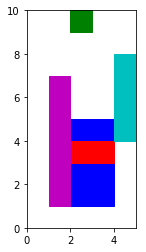

covered area is 22
rectangular(1,1,4,8) 0
rectangular(1,1,4,8) 1
rectangular(1,9,2,10) 2
rectangular(1,3,2,6) 3
rectangular(3,6,5,10) 4
rectangular(4,6,5,10) 5
rectangular(3,3,5,7) 6


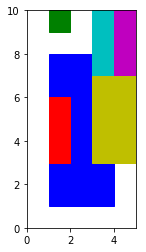

covered area is 45
rectangular(2,9,5,10) 0
rectangular(2,9,5,10) 1
rectangular(1,6,2,8) 2
rectangular(2,6,3,10) 3
rectangular(4,6,5,7) 4
rectangular(2,4,3,7) 5
rectangular(1,5,3,6) 6
rectangular(3,4,4,9) 7


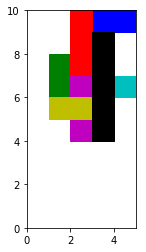

covered area is 20
rectangular(3,6,4,8) 0
rectangular(3,6,4,8) 1
rectangular(1,9,4,10) 2
rectangular(3,9,4,10) 3
rectangular(4,6,5,7) 4
rectangular(1,5,5,9) 5
rectangular(2,3,3,9) 6
rectangular(2,8,5,10) 7
rectangular(4,9,5,10) 8


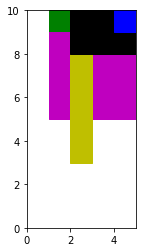

covered area is 36
rectangular(2,9,5,10) 0
rectangular(2,9,5,10) 1
rectangular(2,9,3,10) 2
rectangular(3,4,5,9) 3
rectangular(2,7,4,8) 4
rectangular(3,1,4,6) 5
rectangular(1,6,2,8) 6
rectangular(1,7,3,8) 7
rectangular(2,5,4,6) 8
rectangular(4,9,5,10) 9


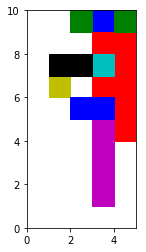

covered area is 28
rectangular(3,7,4,10) 0
rectangular(3,7,4,10) 1
rectangular(4,9,5,10) 2
rectangular(1,5,3,7) 3
rectangular(2,5,4,8) 4
rectangular(4,6,5,10) 5
rectangular(1,8,4,9) 6
rectangular(2,5,5,6) 7
rectangular(3,5,5,10) 8
rectangular(1,1,4,8) 9
rectangular(1,8,3,9) 10


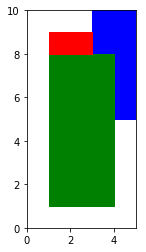

covered area is 57
The average number of needed tower is 10.6
10.6


In [74]:
def tower_needed(L,W):
    
    assert isinstance(L,int) and L>0
    assert isinstance(W,int) and W>0
    
    ratio=0
    n=1
    while ratio<0.999:
        ratio=relative_area(n,L,W)
        n+=1
    return n

def averge(sample,Len,Wid):
    
    assert isinstance(sample,int) and sample>0
    assert isinstance(Len,int) and Len>0
    assert isinstance(Wid,int) and Wid>0
    
    lst0=[]
    k=0
    while k<sample:
        lst0.append(tower_needed(Len,Wid))
        k+=1
    ave=sum(lst0)/len(lst0)
    print('The average number of needed tower is %s')%ave
    return ave
    
print averge(5,10,5)